# Applying L1, L2, and Max Norms For Normalization

L2 norm is the most common norm used with ML algorithms because of how easy it is to calculate cosine similarity with input vectors normalized using the L2 Norm. But depending on the use case you might want to use different kinds of normalization. We will be working with the driver dataset as in the Normalization and Cosine Similarity Notebook. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import Normalizer,normalize
from sklearn.preprocessing import StandardScaler, scale

In [2]:
driver_data = pd.read_csv('Datasets/data_1024.csv', delimiter='\t')

In [3]:
driver_data.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


We go ahead and extract the relevant features that we will work with

In [4]:
driver_data = driver_data[['Distance_Feature', 'Speeding_Feature']]

In [5]:
driver_data.describe()

,Distance_Feature,Speeding_Feature
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


In [6]:
driver_data = driver_data.astype(np.float32)

driver_data.dtypes

Distance_Feature    float32
Speeding_Feature    float32
dtype: object

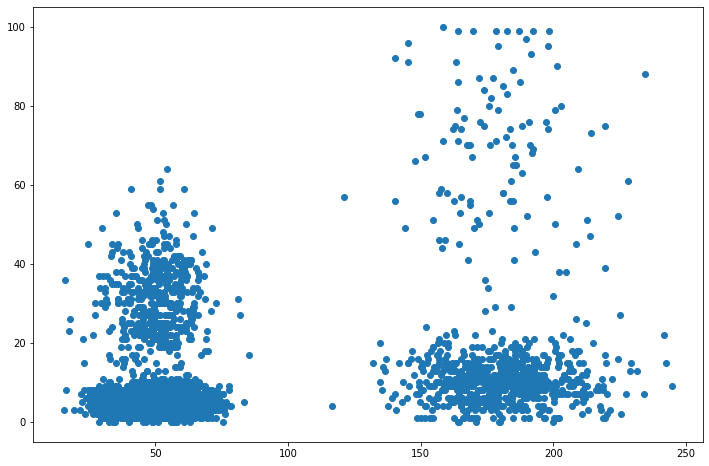

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(driver_data['Distance_Feature'], driver_data['Speeding_Feature'])

This is the same scatterplot we saw in the previous notebook, as a refresher when we normalize our data via the L2 norm:
- The normalization converts each sample in our dataset by finding the squares of the individual vector values and taking their sum
- This will result in the square root of the sum of the squares of each sample (each vector) should be equal to one

Lets take a look at this previous scatter plot for when we have applied the L2 norm to our data

In [8]:
# normalize every sample to the unit L2 norm
normalized_l2_data = pd.DataFrame(normalize(driver_data, norm='l2'), columns=driver_data.columns)

normalized_l2_data.head()

,Distance_Feature,Speeding_Feature
0,0.930694,0.365798
1,0.902956,0.429733
2,0.922526,0.385934
3,0.930058,0.367414
4,0.909165,0.416437


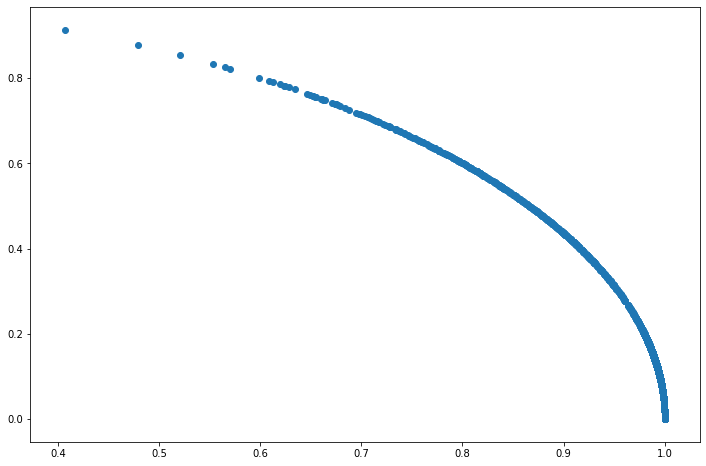

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(normalized_l2_data['Distance_Feature'], normalized_l2_data['Speeding_Feature'])

We can confirm that our data has been normalized to the unit L2 norm by finding the squares of the individual vector values and summing them. Below we have done just that and created a new column called the L2, the entire column has a value of 1

In [10]:
normalized_l2_data['L2'] = normalized_l2_data['Distance_Feature'] * normalized_l2_data['Distance_Feature'] + \
        normalized_l2_data['Speeding_Feature'] * normalized_l2_data['Speeding_Feature']

normalized_l2_data.head()

,Distance_Feature,Speeding_Feature,L2
0,0.930694,0.365798,1.0
1,0.902956,0.429733,1.0
2,0.922526,0.385934,1.0
3,0.930058,0.367414,1.0
4,0.909165,0.416437,1.0


### L1 Norm

On the other hand, we can also normalize our data using the L1 Norm, the process is similar to L2 normalization except that we pass L1 for the norm parameter rather than L2.

When we normalize with the L1 norm the sum of the absolute values of each vector should be equal to one

In [11]:
# Normalizing the data to the unit L1 Norm
normalized_l1_data = pd.DataFrame(normalize(driver_data, norm='l1'), columns=driver_data.columns)

normalized_l1_data.head()

,Distance_Feature,Speeding_Feature
0,0.717856,0.282144
1,0.677544,0.322456
2,0.705047,0.294953
3,0.716823,0.283177
4,0.685851,0.314149


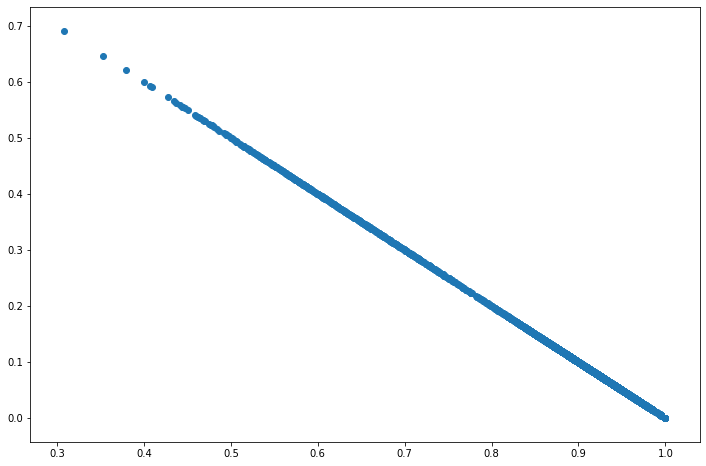

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(normalized_l1_data['Distance_Feature'], normalized_l1_data['Speeding_Feature'])

The scatter plot makes it pretty obvious that the sum of the absolute values of the individual feilds in that vector sum up to one, we can drop vertical and horizontal lines from any point along the line and see that the sum is equal to one. 

We can verify this similar to how we verified the L2 norm, we create a column L1 and sum the the absolute values and storing them in an L1 column. As we can see the entire L1 column has a value of 1

In [13]:
normalized_l1_data['L1'] = normalized_l1_data['Distance_Feature']  + \
        normalized_l1_data['Speeding_Feature']

normalized_l1_data.head()

,Distance_Feature,Speeding_Feature,L1
0,0.717856,0.282144,1.0
1,0.677544,0.322456,1.0
2,0.705047,0.294953,1.0
3,0.716823,0.283177,1.0
4,0.685851,0.314149,1.0


### Max Norm

This is the third kind of normalization we can perform using scikit-learns normalize function. Here we normalize the data using the unit Max Norm, which is scaling to the maximum value of the vector.

When we do this on our dataset we see that the maximum value for the distance feature is always equal to one because it is normalized with respect to itself. The speeding feature is a fraction of this maximum value 

In [14]:
normalized_max_data = pd.DataFrame(normalize(driver_data, norm='max'), columns=driver_data.columns)

normalized_max_data.head()

,Distance_Feature,Speeding_Feature
0,1.0,0.393038
1,1.0,0.475919
2,1.0,0.418345
3,1.0,0.395044
4,1.0,0.458043


In [15]:
normalized_max_data.sample(10)

,Distance_Feature,Speeding_Feature
2874,1.0,0.088417
1484,1.0,0.050830
1442,1.0,0.136550
3643,1.0,0.074366
3167,1.0,0.176263
1110,1.0,0.056306
2418,1.0,0.101764
2922,1.0,0.111235
664,1.0,0.126609
2224,1.0,0.078927


### Using the Normalizer Estmator API

We can normalize our data using the normalize function as we did before or you can use the Normalizer estimator API
- copy: whether or not to create a new copy or not of the normalized data 
- fit_transform: fit on the driver data and transform it to normalized form

Here we use the L2 norm 

In [16]:
normalizer = Normalizer(copy=True, norm='l2')

normalized_array = normalizer.fit_transform(driver_data)

normalized_data = pd.DataFrame(normalized_array, columns=driver_data.columns)

normalized_data.head()

,Distance_Feature,Speeding_Feature
0,0.930694,0.365798
1,0.902956,0.429733
2,0.922526,0.385934
3,0.930058,0.367414
4,0.909165,0.416437
